# Basics of Probability and Likelihood

Throughout machine learning terms like probaility, a-posterior probability, likelihood and odds ratio crop up.  Actually understanding the interplayb between these related concepts can at first be difficult. Matters are not made simpler by the reality that in real-world applications information assumed by a rigorous application of these ideas lie beyond our reach.

For these reasons, this notebook creates a clean closed-world exampler were all the key elements are fully defined and this toy example is then useful as a means to clarify the interlocking pieces. 


Last Update 2/15/2022

**The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


In [20]:
import numpy as np
import math as math
import matplotlib.pyplot as plt

# Part 1: The Binomial Distribution

The binomial distribution often takes center stage in situations where there are two possible outcomes and multiple independent samples are avaialble.  The common practical introduction to binomial distributions starts with a discussion of coin tossing.  

Consider tossing a fair coin 10 times. What is the probability of seeing heads exactly 5 times?

To begin, here is the probability mass function for the binomial distribution which gives us the exact answer to our question.

$$
P(k ; N, p) \; = \:
{{N}\choose{k}} p^{k} ( 1 - p )^{N-k}
$$

In this equation $N$ is the total number of trials, i.e. coin tosses. The value $k$ is the number of successes, i.e. times the coins comes up heads. The value of $p$ is the probability of success, i.e. probability the coin comes up heads on single toss. 

In [21]:
def n_choose_k (n,k) :
    res = math.factorial(n) // (math.factorial(k) * math.factorial(n-k))
    return res
    
def binomial_mass_function(k, n, p) :
    res = n_choose_k(n,k) * pow(p,k) * pow(1 - p, n - k)
    return res
    
foo = binomial_mass_function(1, 10**4, 0.5)
foo

0.0

The answer to our question is that the probability of observing exactly $5$ heads in $10$ tosses for a fair coin is close to $25$ out of $100$ - or $0.25$

If you wish this may be a good point further review the [binomial distribution probability mass function](https://en.wikipedia.org/wiki/Binomial_distribution). 

## Digression about Precision

The following may be a bit of overkill, but binomial distributions quickly raise interesting practical questions about probabilities and calculations. With that in mind, here is a variant on the standard form given above but in such a way that Python's ability to work with very large integers and true fractions helps us avoid floating point precision questions (entirely)

$$
P(k ; N, a, b) \; = \: \frac{{{N}\choose{k}}a^{k} ( b - a )^{N-k}}{b^{N}} 
\;\; \text{where}
\;\; p = \frac{a}{b}
$$

In [22]:
from fractions import Fraction

def binomial_mass_function_rational(k, n, a, b) :
    num = n_choose_k(n,k) * pow(a,k) * pow(b - a, n - k)
    den = pow(b,n)
    return Fraction(num,den)
    
#rat = binomial_mass_function_rational(5, 10, 1, 2)
rat = binomial_mass_function_rational(5, 10, 1, 2)
print(f'The probability is {rat.numerator} / {rat.denominator} - as a float {float(rat):10.8f}' )

The probability is 63 / 256 - as a float 0.24609375


So far this may not to seem important, but in general realize that the probability of any particular outcome starts to become very small even for apparently simple problems.  Let us illustrate with a slight variant upon the above question.

What is the probability of seeing heads only once in $100$ tosses of a fair coin?

In [23]:
rat = binomial_mass_function_rational(1, 10**2, 1, 2)
rat_float = float(rat)
print(f'The probability is {rat.numerator} / {rat.denominator} - as a float {rat_float:10.8f}' )

The probability is 25 / 316912650057057350374175801344 - as a float 0.00000000


Take away from this little example that just because a probability of an outcome is terribly small do not confuse it with impossible.

The set of all possible outcomes, and yes I will speak of this as the set $\Omega$ is itself a key concept.  Why?  Because on feature of a probability is that the sum of the probability over the space of all possible outcomes $\Omega$ must be one.  

With this constraint in mind, consider again the floating point versus rational number approach to computing the binomial mass funciton. 

In [24]:
foo = [binomial_mass_function_rational(i,100,1,2) for i in range(101)]
addem = foo[0]
for i in range(1,101) :
    addem = addem + foo[i]
addem

Fraction(1, 1)

And while it may not seem like a big deal - here is the equivalent calcuation using our original setup in which probabilities were returned as floating point numbers.  Close, but not identical.

In [25]:
foo = [binomial_mass_function(i,100,1/2) for i in range(101)]
addem = foo[0]
for i in range(1,101) :
    addem = addem + foo[i]
addem

1.0000000000000002

# Overview: Reasoning from First Principals

We are about to do several things at once. 

From a very pragmatic side the next step is to go from our way of correctly computing the probability of $k$ heads in $n$ trials with a coin whose proability of heads on a given trial is $a$ divided by $b$.  

However, we doing this as a step along the path to working out optimal deicsion rules for problems where the underlying behavior is perfectly known. In other words, we will reason from first prinicipals based upon the assumption that our task involves fair (and unfair) coins. 

# Part 2: A Fair and an Unfair Coin 

Here are the probability mass functions for both a fair ($p=\frac{1}{2}$) and an unfair ($p=\frac{1}{5}$) coin. 

Probabilities for outcomes zero to n heads:
 [0.001  0.0098 0.0439 0.1172 0.2051 0.2461 0.2051 0.1172 0.0439 0.0098
 0.001 ]


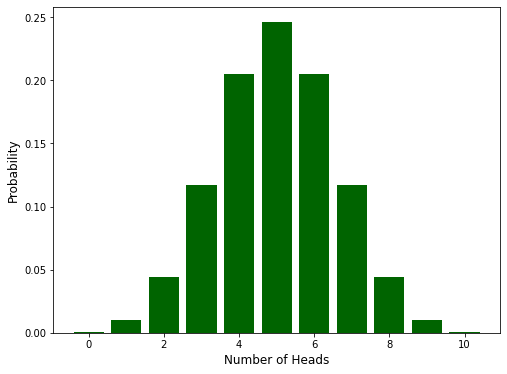

In [26]:
tosses = 10; a = 1; b = 2
mass = np.array([float(binomial_mass_function_rational(i,tosses,a,b)) for i in range(tosses+1)])
np.set_printoptions(precision=4)
print(f'Probabilities for outcomes zero to n heads:\n {mass}')

fig = plt.figure(figsize=(8, 6))
plt.bar(np.arange(tosses+1),mass,color='darkgreen')
plt.xlabel('Number of Heads',fontsize=12);
plt.ylabel('Probability', fontsize=12);

What if the coins is not fair. In other words, it only comes up heads one out of five times?

Probabilities for outcomes zero to n heads:
 [1.0737e-01 2.6844e-01 3.0199e-01 2.0133e-01 8.8080e-02 2.6424e-02
 5.5050e-03 7.8643e-04 7.3728e-05 4.0960e-06 1.0240e-07]


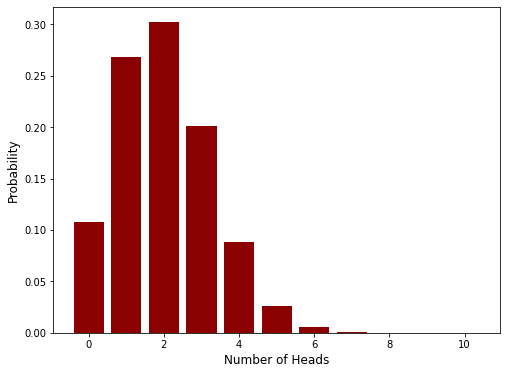

In [27]:
tosses = 10; a = 1; b = 5
mass = np.array([float(binomial_mass_function_rational(i,tosses,a,b)) for i in range(tosses+1)])
np.set_printoptions(precision=4)
print(f'Probabilities for outcomes zero to n heads:\n {mass}')

fig = plt.figure(figsize=(8, 6))
plt.bar(np.arange(tosses+1),mass,color='darkred')
plt.xlabel('Number of Heads',fontsize=12);
plt.ylabel('Probability', fontsize=12);

# Part 3: A Gambling Game

At the risk of gross oversimplification, machine learning is about using data to create strategies for intelligently guessing a label or a value. While perhaps a bit simplistic, this view quickly motivates some very important concepts which include Bayes rule, Maximum A-Posteri estimation, Maximum Likelihood and finally odds ratios.

However, let us start off with some sound commmon sense reasoning about the following game.

Here is how one round of the game is played. 

1. I am going to pick at random either a fair coin ($p = \frac{1}{2}$) or an unfair coind ($p = \frac{1}{5}$. I will then proceed to toss it $10$ times and we will both observe the number of times it comes up heads ($k$ observed). 

2. You must guess if the coin I picked at random is fair or unfair. If you guess correctly I give you a dollar, otherwise you give me a dollar.

We can play this game for as many rounds as you like - within reason and the limits of computer and simulation - and of course what matters is whether you can devise a strategy to win money.

## Simulating Game Play

In order to write the code to simulate game and different strategies we begin my taking advantage of the capabilities built into the NumPy random number generator.

In [28]:
def tosses_heads (n, p) :
    rng = np.random.default_rng()
    cnt = np.sum(rng.random(10) > (1 - p) )
    return cnt

def trial_10_fair () : return tosses_heads(10, 1/2)

def trial_10_unfair () : return tosses_heads(10, 1/5)

Let us use the above to the outcomes of 100 games using only a fair coin.

In [29]:
tosses = 10; n_games = 10**2
data = np.array([trial_10_fair() for i in range(n_games)])
sumc = np.bincount(data,minlength=tosses+1)
print(f'Game Outcomes:\n{data}')
print(f'Count of Outcomes:\n{sumc}')
print(f'Fewest and most heads seen: {np.min(data)} and {np.max(data)}')
None

Game Outcomes:
[5 7 7 4 7 5 4 4 4 8 2 5 8 8 7 3 4 8 3 4 4 6 7 5 5 3 6 4 6 3 3 6 5 2 6 5 5
 4 7 8 3 7 7 3 3 6 5 5 6 7 5 6 5 1 5 6 7 3 6 5 6 4 5 4 4 2 5 5 4 5 5 4 5 5
 7 6 6 5 4 4 5 5 5 4 6 2 5 6 6 5 4 7 5 5 5 7 6 6 4 4]
Count of Outcomes:
[ 0  1  4  9 20 30 18 13  5  0  0]
Fewest and most heads seen: 1 and 8


Now let us look at the probability mass function - curve plot - and the actual empirical results over different numbers ofgames. 

As the number of games increases what we observe comes closer to what we exepct based upon how we constructed the game in the first place.

### An Asside about Code for Plotting

You see below that the two plots are sufficiently similar that a function was written to generate each - thus highlighitng what is common and making changes to each simpler. As you coding skills develop you should aspire simplify and consolidate code in this manner. However, do not confuse the final product with how it came to be. Rest assured the instructor first wrote the brute force longer version and got it working - and only then did the more consolidated version you see here get written. 

In [30]:
def gen_plot_theory_samples (ax, tosses, n_games, mass, freq, fair_p) :
    '''This function creates a plot where the empirical observation of number of heads 
    is shown in comparison to probability from first principals.
    The function is designed to readily generate similar plots 
    for fair and unfair coins.'''
    title_swap = ' Fair ' if fair_p else ' Unfair ' 
    base_color = 'darkgreen' if fair_p else 'darkred'
    ax.scatter(np.arange(tosses+1),mass,color=base_color,marker='_',s=300.0)
    ax.bar(np.arange(tosses+1),freq,color=base_color,alpha=0.5)
    ax.set_title("{:,}".format(n_games) + ' Games' + title_swap + 'Coin',fontsize=14)
    ax.set_xlabel('Number of Heads',fontsize=12);
    ax.set_ylabel('Probability / Frequency', fontsize=12);
    pass

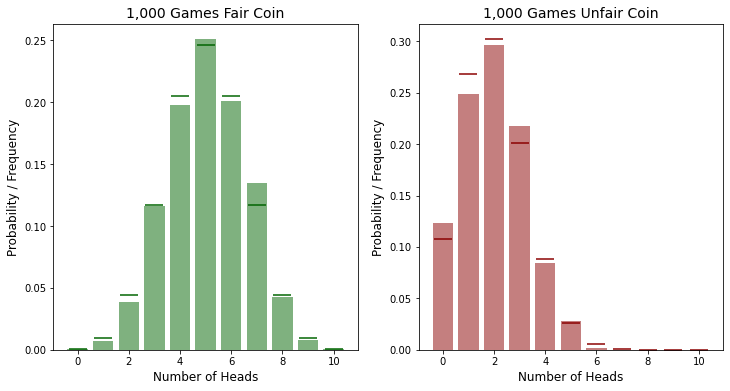

In [31]:
n_games = 10**3; tosses = 10

a = 1; b = 2
mass = np.array([float(binomial_mass_function_rational(i,tosses,a,b)) for i in range(tosses+1)])
data = np.array([trial_10_fair() for i in range(n_games)])
freq = np.bincount(data,minlength=tosses+1)/n_games

fig, ax = plt.subplots(1,2, figsize=(12, 6))
gen_plot_theory_samples(ax[0], tosses, n_games, mass, freq, True)

a = 1; b = 5
mass = np.array([float(binomial_mass_function_rational(i,tosses,a,b)) for i in range(tosses+1)])
data = np.array([trial_10_unfair() for i in range(n_games)])
freq = np.bincount(data,minlength=tosses+1)/n_games

gen_plot_theory_samples(ax[1], tosses, n_games, mass, freq, False)

# Play the Guessing Game

Now that we have the simulations we need it is time to build the game. 

## Player 1 - Guess Always Fair

Just to get us started, let us build a player whose strategy is to simply always guess that the coin tossed was a fair coin. How do you expect this player to do in terms of winnings. To be clear, the player wins a dollar every time they guess correctly and loose a dollar everytime they guess incorrectly.

In [32]:
def trial_10 (fair_p) :
    return tosses_heads(10, 1/2 if fair_p else 1/5)
    
def player_1 (n_heads) :
    '''Always choose fair coin which is signafied by returning True'''
    return True

def player_1_games (n) :
    rng = np.random.default_rng()
    fair = rng.random(n) > 1/2
    print(fair)
    outcomes = np.array([trial_10(fp) for fp in fair])
    games = np.array([player_1(outcomes[i]) == fair[i] for i in range(n)])
    wins   = np.sum(games)
    losses = np.sum(~games)
    return wins - losses
    

In [33]:
player_1_games(10**4)

[ True False  True ... False  True  True]


74

## Player 2 - Most Likely

There is a very intuitive strategy that leads nicely toward more formal decision theory. 

We'll get back to the more formal motivation shortly, but for now, let us just look at the probability mass functions for the fair and unfair coin.

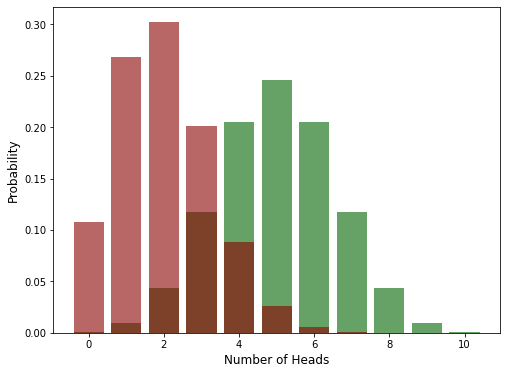

In [34]:
tosses = 10
mass_fair   = np.array([float(binomial_mass_function_rational(i,tosses,1,2)) for i in range(tosses+1)])
mass_unfair = np.array([float(binomial_mass_function_rational(i,tosses,1,5)) for i in range(tosses+1)])
np.set_printoptions(precision=4)

fig = plt.figure(figsize=(8, 6))
plt.bar(np.arange(tosses+1),mass_fair,color='darkgreen',alpha=0.6)
plt.bar(np.arange(tosses+1),mass_unfair,color='darkred',alpha=0.6)
plt.xlabel('Number of Heads',fontsize=12);
plt.ylabel('Probability', fontsize=12);

Just eye ball these two histograms and keep in mind you able to see each distribution even though the overlap because of semi-transparent rendering.  The fair coin probabilities are in green, the unfair in red, and since each is partially transparent where the distributions overlap you see brown.  

What should jump out is that the probability values are higher for an unfair versus a fair coin when $k$ is $0, 1, 2$ and $3$. Otherwise, the probability is higher for a fair coin.  

## Player 2

This clearly suggests a strategy; pick fair if and only if observed heads is 4 or greater.

In [35]:
def player_2 (n_heads, threshold = 3) :
    '''Choose fair coin over unfair iff number of heads observed is greater than 3'''
    if (n_heads > threshold) :
        return True
    else:
        return False

def player_2_games (n, print_accuracy=False) :
    '''This function will simulate n rounds of play for player 2. 
    The result is returned as the amount of money won by player 2. '''
    rng = np.random.default_rng()
    fair_true = rng.random(n) > 1/2
    outcomes  = np.array([trial_10(fp) for fp in fair_true])
    predicts  = np.array([player_2(outcomes[i]) for i in range(n)])
    corrects  = fair_true == predicts
    wins   = np.sum(corrects)
    losses = np.sum(~corrects)
    if print_accuracy : print(f'Accuracy of Guesses: {wins/n:5.3f}')
    return wins - losses
    

In [36]:
player_2_games (10**3)

700

What we've done so far should make a lot of intuitive sense; guess the most likely of the two cases, i.e. fair versus not fair, based upon the relative probability conditioned upon the number of heads actually observed. If you let player 2 play more games then player 2 consistently earns more money.  This was not true for player 1.

### One More Thing - Accuracy

Notice that by introducing our guessing game as a gambling excercise we side-stepped ever actually measuring the accuracy of the guesses. Let us tidy up this small omission.

In [37]:
player_2_games (10**3, print_accuracy=True)

Accuracy of Guesses: 0.834


668

# Part 4: Accuracy Follows from First Principals

At this point we've shown that we can simulate game play an record and empirical estimate of how accurately Player 2 is guessing.  But because we have complete knowledge of the game we can of course go back to the original distributions and explain what we are oberving. 


In [41]:
def plot_mistakes_for_a_threshold(threshold) :
    tosses = 10

    mass_fair   = np.array([float(binomial_mass_function_rational(i,tosses,1,2)) for i in range(tosses+1)])
    mass_unfair = np.array([float(binomial_mass_function_rational(i,tosses,1,5)) for i in range(tosses+1)])

    # Note below we re-normalize so pair of distributions sum to 1.0
    mass_fair = mass_fair / 2.0
    mass_unfair = mass_unfair / 2.0

    fair_mislabeled   = np.zeros(tosses+1)
    unfair_mislabeled = np.zeros(tosses+1)
    for i in range(0,threshold+1) : fair_mislabeled[i] = mass_fair[i]
    for i in range(threshold+1,tosses+1) : unfair_mislabeled[i] = mass_unfair[i]

    fig = plt.figure(figsize=(8, 6))
    plt.bar(np.arange(tosses+1),mass_fair,color='darkgreen',alpha=1.0)
    plt.bar(np.arange(tosses+1),mass_unfair,color='darkred',alpha=1.0)
    plt.bar(np.arange(tosses+1),fair_mislabeled,color='darkorange',alpha=1.0)
    plt.bar(np.arange(tosses+1),unfair_mislabeled,color='yellow',alpha=1.0)

    accuracy = 1.0 - np.sum(fair_mislabeled + unfair_mislabeled)
    ptitle = f'Threshold is {threshold} and expected accuracy is {accuracy:5.3f}'
    print(ptitle)
    plt.title(ptitle,fontsize=14)
    plt.xlabel('Number of Heads',fontsize=12);
    plt.ylabel('Probability Conditioned Upon Class', fontsize=12);

Threshold is 3 and expected accuracy is 0.854


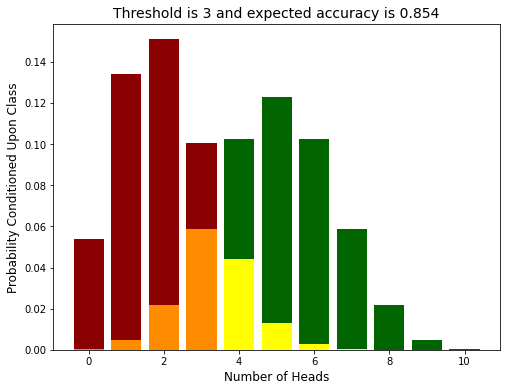

In [42]:
plot_mistakes_for_a_threshold(3)

Notice now that you can actually see very clearly the reason for selecting the threshold which will in expectation yield the most accurate predictions. To say a bit more, Player 2 guesses incorrectly when the fair coin generates as many heads (or fewer) than the theshold (shown in orange).  Player 2 also guesses incorrectly when the unfair coin generates more heads than the threshold (shown in gold).

One more important detail that foreshadows the next note book.  Note that the vertical axis probabilities are divided by two and are now described as conditioned upon whether the outcome is heads or tails. We will talk more explicitly next time about what to do when some classes arise more often in our sample than others.

# Part 5: Likelihood Ratio

The concept of looking at the relative likelihood as expressed as ratios of probabilities is common. While I frankly find the wikipedia writeup less than wonderful - if you want more you can go to [Likelihood Function](https://en.wikipedia.org/wiki/Likelihood_function).

This concept is actually relatively simple to define by example using what we've already built for our coin toss gambling game.  To begin let us formalize what we established for the game:

$$ 
P( k \,|\, \text{fair} ) \; = \; {{10}\choose{k}} p^{k} ( 1 - p )^{N-k} \;\;\; \text{where} \;\;\; p = \frac{1}{2}
$$

$$
P( k \,|\, \text{unfair} ) \; = \; {{10}\choose{k}} p^{k} ( 1 - p )^{N-k} \;\;\; \text{where} \;\;\; p = \frac{1}{5}
$$

Now learning to say and understand these two mathematical statements clearly in English is half the battle to understanding the process of guessing a class label from observed data.  Here is a go at the top equation in English:

<blockquote>
    The probability of observing $k$ heads in $10$ trials conditioned upon the knowledge that the coin comes from the class of fair coins is ...
</blockquote>

Thus, by example, we are bringing in the extremely important notion of conditional probability.  

As a bit of a teaser for the next lecture, do keep the following in mind

$$
P( \text{fair} \,|\, k ) \; \neq \; P( k \,|\, \text{fair} )
$$

Indeed, if we write 

$$
P( \text{fair} \,|\, k )
$$

then the English translation is 

<blockquote>
    The probability that the coin belongs to the class fair conditioned upon having observed $k$ out of $10$ heads.
</blockquote>

To really say why there are not equal takes into Bayes Rule - which is a topic for down the road. 


## The Coin Toss Game Likelihodd Ratio

For the moment, let us see what our decision rule above looks like in terms of what we do know well, namely $P( k \,|\, \text{fair} )$ and $P( k \,|\, \text{unfair} )$. What our intuition let us to select was as follows:

$$
\text{if} \;\;\; P( k \,|\, \text{fair} ) \; > \;  P( k \,|\, \text{unfair} ) \;\;\; \text{then guess Fair}
$$

With a little manipulation the above is equivalent to 

$$
\text{if} \;\;\; \frac{P( k \,|\, \text{fair} )}{P( k \,|\, \text{unfair} )} \; > \; 1 \;\;\; \text{then guess Fair}
$$

or even

$$
\text{if} \;\;\; \log \left( \frac{P( k \,|\, \text{fair} )}{P( k \,|\, \text{unfair} )} \right) \; > \; 0 \;\;\; \text{then guess Fair}
$$




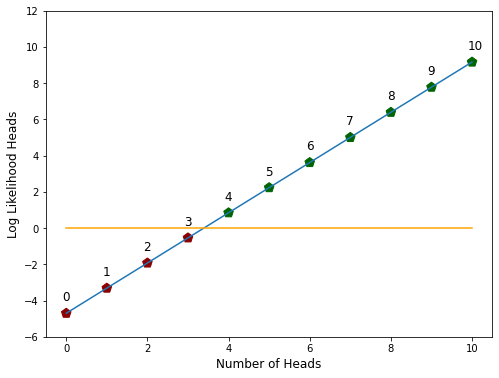

In [21]:
tosses = 10
mass_fair   = np.array([float(binomial_mass_function_rational(i,tosses,1,2)) for i in range(tosses+1)])
mass_unfair = np.array([float(binomial_mass_function_rational(i,tosses,1,5)) for i in range(tosses+1)])

log_like = np.log(mass_fair / mass_unfair )
tosses_a = np.arange(tosses+1)
colors = ['darkgreen' if x else 'darkred' for x in log_like > 0]

fig = plt.figure(figsize=(8, 6))
plt.plot(tosses_a, log_like,'-')
plt.scatter(tosses_a, log_like, marker='p', s=100, color=colors)
plt.plot(tosses_a, np.zeros(tosses+1), color='orange')
for x, y, text in zip(tosses_a, log_like, tosses_a) : 
    plt.text(x-0.1, y+0.7, text, fontsize=12)
plt.ylim([-6, 12])
plt.xlabel('Number of Heads',fontsize=12);
plt.ylabel('Log Likelihood Heads', fontsize=12);